In [141]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [142]:
frame = pd.read_csv('gflops.tsv', sep='\t').transpose()

In [143]:
frame

,0,1,2,3,4,5,6,7
GFlops,Generator (naive),Generator (frame only),Generator (batch only),Generator (proposed),Discriminator (naive),Discriminator (frame only),Discriminator (batch only),Discriminator (proposed)
L1,192.41,192.41,192.41,192.41,36.09,36.09,36.09,36.09
L2,35.61,17.8,17.8,8.9,144.34,72.17,72.17,36.09
L3,36.18,9.05,9.05,2.26,577.37,172.19,144.34,43.05
L4,96.37,12.05,12.05,1.51,2309.48,478.09,288.69,59.76
Total,360.57,231.3,231.3,205.08,3067.28,758.54,541.29,174.98


/home/msaito/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  import sys


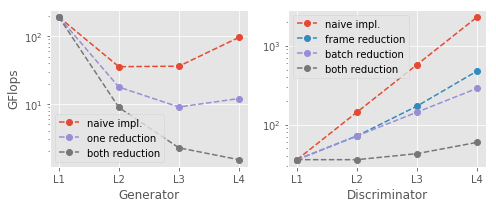

In [144]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)

plt.plot(frame[0].tolist()[1:5], linestyle="dashed", marker='o', label='naive impl.')
plt.gca().set_color_cycle(colors[2:4])
plt.plot(frame[1].tolist()[1:5], linestyle="dashed", marker='o', label='one reduction')
#plt.plot(frame[2].tolist()[1:5], linestyle="dashed", marker='o', label='batch reduction')
plt.plot(frame[3].tolist()[1:5], linestyle="dashed", marker='o', label='both reduction')
plt.yscale('log')
plt.xticks(np.arange(4), frame.index.tolist()[1:5])
plt.ylabel('GFlops')
plt.xlabel('Generator')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(frame[4].tolist()[1:5], linestyle="dashed", marker='o', label='naive impl.')
plt.plot(frame[5].tolist()[1:5], linestyle="dashed", marker='o', label='frame reduction')
plt.plot(frame[6].tolist()[1:5], linestyle="dashed", marker='o', label='batch reduction')
plt.plot(frame[7].tolist()[1:5], linestyle="dashed", marker='o', label='both reduction')
plt.yscale('log')
plt.xticks(np.arange(4), frame.index.tolist()[1:5])
#plt.ylabel('GFlops')
plt.xlabel('Discriminator')
plt.legend()
plt.tight_layout()

plt.savefig('gflops.pdf')

In [145]:
frame = pd.read_csv('memory.tsv', sep='\t').transpose()

In [146]:
frame

,0,1,2,3,4,5,6,7
Memory (Gb),Generator (naive),Generator (frame only),Generator (batch only),Generator (proposed),Discriminator (naive),Discriminator (frame only),Discriminator (batch only),Discriminator (proposed)
L1,0.722,0.722,0.722,0.722,0.185,0.184,0.185,0.185
L2,0.745,0.39,0.39,0.195,0.736,0.368,0.369,0.185
L3,1.503,0.393,0.393,0.098,2.952,0.76,0.739,0.19
L4,4.746,0.611,0.611,0.076,11.816,1.688,1.477,0.211
Total,7.716,2.116,2.116,1.091,15.689,3,2.77,0.771
Reduction,NaN,3.65,3.65,7.07,NaN,5.23,5.66,20.35


/home/msaito/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  import sys


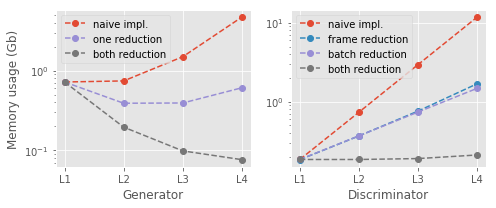

In [147]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)

plt.plot(frame[0].tolist()[1:5], linestyle="dashed", marker='o', label='naive impl.')
plt.gca().set_color_cycle(colors[2:4])
plt.plot(frame[1].tolist()[1:5], linestyle="dashed", marker='o', label='one reduction')
#plt.plot(frame[2].tolist()[1:5], linestyle="dashed", marker='o', label='batch reduction')
plt.plot(frame[3].tolist()[1:5], linestyle="dashed", marker='o', label='both reduction')
plt.yscale('log')
plt.xticks(np.arange(4), frame.index.tolist()[1:5])
plt.ylabel('Memory usage (Gb)')
plt.xlabel('Generator')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(frame[4].tolist()[1:5], linestyle="dashed", marker='o', label='naive impl.')
plt.plot(frame[5].tolist()[1:5], linestyle="dashed", marker='o', label='frame reduction')
plt.plot(frame[6].tolist()[1:5], linestyle="dashed", marker='o', label='batch reduction')
plt.plot(frame[7].tolist()[1:5], linestyle="dashed", marker='o', label='both reduction')
plt.yscale('log')
plt.xticks(np.arange(4), frame.index.tolist()[1:5])
#plt.ylabel('Memory usage (Gb)')
plt.xlabel('Discriminator')
plt.legend()
plt.tight_layout()
plt.savefig('discriminator_memory.pdf')

plt.tight_layout()
plt.savefig('memory.pdf')